# SC1015 Intro to DSAI: Mini-Project
SC1015 (AY22/23) **A139 Team 5** Members: 
1. Ev Chua Yee Suan (U2222559E)
2. Fan Jin Min (U2220358C)
3. Boonkitrungpaisarn Potala (U2222312E)

Dataset used: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

## Introduction
- **Objective:** The objective for this mini-project is to find out the factors that could affect a student's grades, and thereafter try some machine learning techniques to see if we can predict a student's grade band given some student's data.
- **Significance:** There can be many factors that affect a student's academic grades, such as his/her family background and lifestyle. By considering these factors, this mini-project may be significant in identifying weaker performing students so that additional help can be rendered to them early and help them score better grades.

***
Summary
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Preparation](#Data-Preparation)
- [Preliminary Machine Learning](#Preliminary-Machine-Learning-(Methodology))
- [Machine Learning (Experiments)](#Machine-Learning-(Experiments))
- [Conclusion](#Conclusion)
***

### Dataset (student-mat.csv and student-por.csv)
The data was obtained in a survey of students math and portuguese language courses in secondary school. 

#### Columns:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import datasets 
from matplotlib import pyplot as plt
%matplotlib inline

## Data Preprocessing

In [2]:
# Students under math course dataset
df1 = pd.read_csv('student-mat.csv')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# students under portugese course dataset
df2 = pd.read_csv('student-por.csv')
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# There are two datasets, Math courses and Portugese courses. We will combine both to make into one dataset
data = df1.merge(df2, how='outer')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

There are a total of 1044 entries.

In [6]:
# List out all variables with nulls/missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Since there are no null values in any columns, there is no need to handle missing values.

In [7]:
# Get list of numeric and nonnumeric variables
numvars = list(data.columns[data.dtypes != "object"])
nonnumvars = list(data.columns[data.dtypes == "object"])
print("List of numeric variables: ", numvars)
print("List of non-numeric variables: ", nonnumvars)

List of numeric variables:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
List of non-numeric variables:  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


We noticed that several columns which are binary in value (based on the attributes' description) are of 'object' datatype:

- sex - student's sex (binary: 'F' - female or 'M' - male)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)

We will change each 'object' type to 'int64' type for easier analysis.

In [8]:
# Map sex to numeric values
# F: 0 
# M: 1
data["sex"] = data["sex"].map({"M":0, "F":1})

# Map address to numeric values
# rural: 0 
# urban: 1
data["address"] = data["address"].map({"R":0, "U":1})

# Map famsize to numeric values
# LE3: 0 
# GT3: 1
data["famsize"] = data["famsize"].map({"LE3":0, "GT3":1})

# Map Pstatus to numeric values
# A (apart): 0 
# T (together): 1
data["Pstatus"] = data["Pstatus"].map({"A":0, "T":1})

# Map schoolsup to numeric values
# no: 0 
# yes: 1
data["schoolsup"] = data["schoolsup"].map({"no":0, "yes":1})

# Map famsup to numeric values
# no: 0 
# yes: 1
data["famsup"] = data["famsup"].map({"no":0, "yes":1})

# Map paid to numeric values
# no: 0 
# yes: 1
data["paid"] = data["paid"].map({"no":0, "yes":1})

# Map activities to numeric values
# no: 0 
# yes: 1
data["activities"] = data["activities"].map({"no":0, "yes":1})

# Map nursery to numeric values
# no: 0 
# yes: 1
data["nursery"] = data["nursery"].map({"no":0, "yes":1})

# Map higher to numeric values
# no: 0 
# yes: 1
data["higher"] = data["higher"].map({"no":0, "yes":1})

# Map internet to numeric values
# no: 0 
# yes: 1
data["internet"] = data["internet"].map({"no":0, "yes":1})

# Map romantic to numeric values
# no: 0 
# yes: 1
data["romantic"] = data["romantic"].map({"no":0, "yes":1})

In [9]:
data.dtypes

school        object
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   int64 
 2   age         1044 non-null   int64 
 3   address     1044 non-null   int64 
 4   famsize     1044 non-null   int64 
 5   Pstatus     1044 non-null   int64 
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   int64 
 16  famsup      1044 non-null   int64 
 17  paid        1044 non-null   int64 
 18  activities  1044 non-null   int64 
 19  nursery     1044 non-null   int64 
 20  higher  

In [11]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,1,1,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,1,0,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,1,1,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,1,1,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,1,19,0,1,1,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,1,18,1,0,1,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,1,18,1,1,1,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,0,17,1,0,1,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Before we start exploring the columns, we will focus on the G3 scores. 

G3 - final grade (numeric: from 0 to 20, output target)

As the grades is numeric and ranges from 0 to 20, we want to create grade bandings so that it is easier to group the students based on their G3 grade. To do that, we create our own banding system as follows:
- Band 1 (best): G3 > 15
- Band 2: 10 < G3 <= 15
- Band 3: 5 < G3 <= 10
- Band 4: G3 <= 5

In [12]:
# Create new column for G3 bandings
def conditions(data):
    if (data['G3'] <= 5):
        return 4
    elif (data['G3'] <= 10):
        return 3
    elif (data['G3'] <= 15):
        return 2
    else:
        return 1

In [13]:
data['G3_band'] = data.apply(conditions, axis=1)

## Exploratory Data Analysis

We will now look at the distributions of the three exam grades (G1, G2, G3) to get started.

In [14]:
data[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,1044.000000,1044.000000,1044.000000
mean,11.213602,11.246169,11.341954
std,2.983394,3.285071,3.864796
min,0.000000,0.000000,0.000000
25%,9.000000,9.000000,10.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


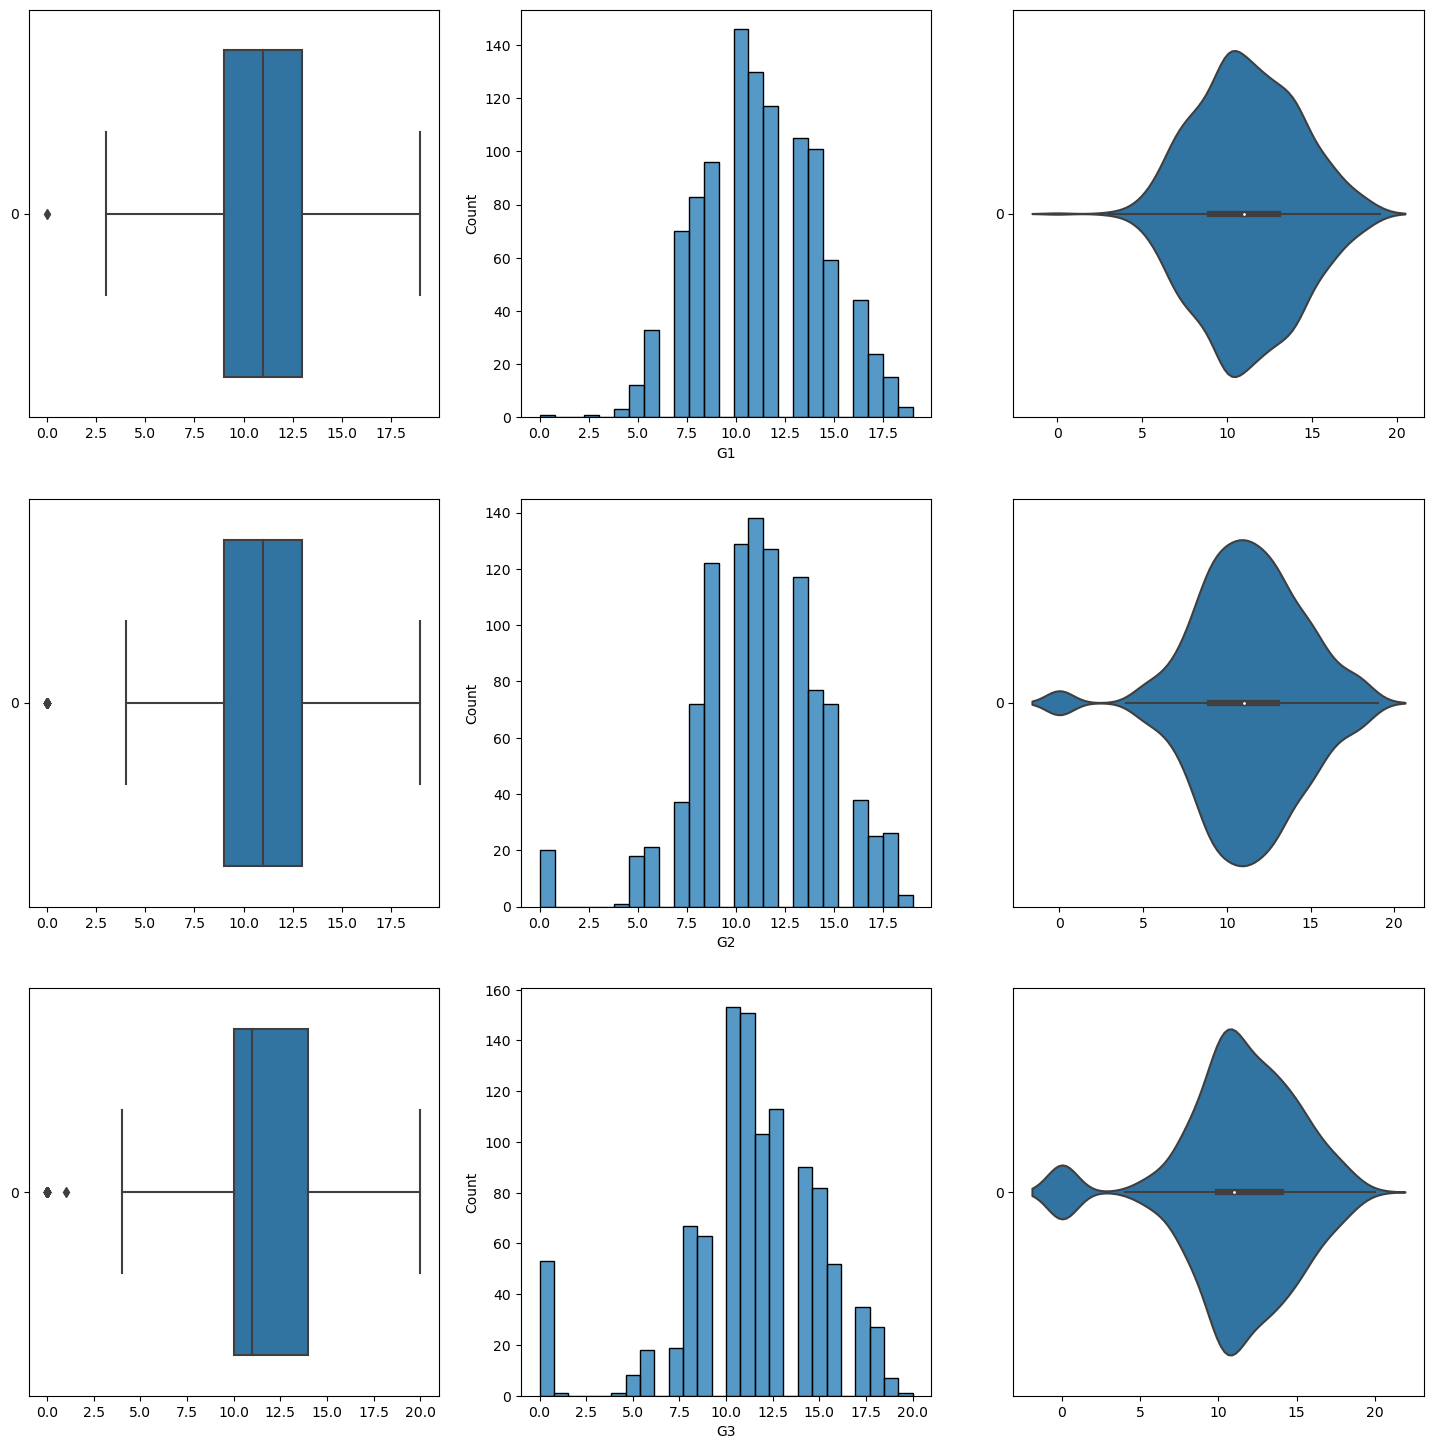

In [15]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 18))

count = 0
for grade in ['G1','G2','G3']:
    sb.boxplot(data = data[grade], orient = "h", ax = axes[count,0])
    sb.histplot(data = data[grade], ax = axes[count,1])
    sb.violinplot(data = data[grade], orient = "h", ax = axes[count,2])
    count += 1

By observing, students who scored 0 in the respective tests are outliers. The means of each test grades is around 11.2, with similar quartiles across the three tests.

We will look at the G3_band distribution by its histplot to see if there is anything else interesting.

<AxesSubplot:xlabel='G3_band', ylabel='Count'>

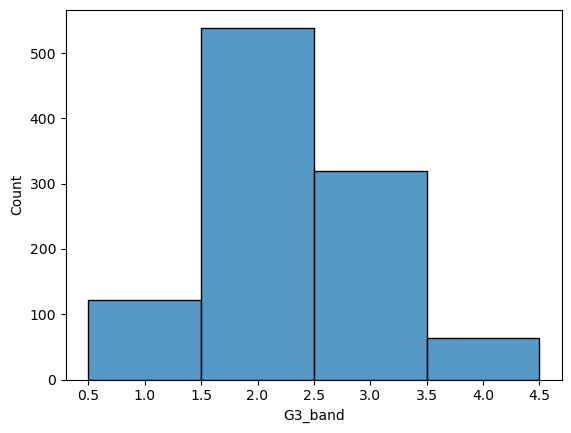

In [16]:
arr = np.array([1,2,3,4])
sb.histplot(data = data['G3_band'], binwidth=1, discrete=True)

The bulk of the students scored above 10 and at most 15 (Band 2). There is about 550 of them, based on the histplot. This can also be observed from the earlier distribution plots for G3, where there is a higher frequency in the 10 to 15 range.

Let's see the heatmap of the correlation matrix of the dataset we have.

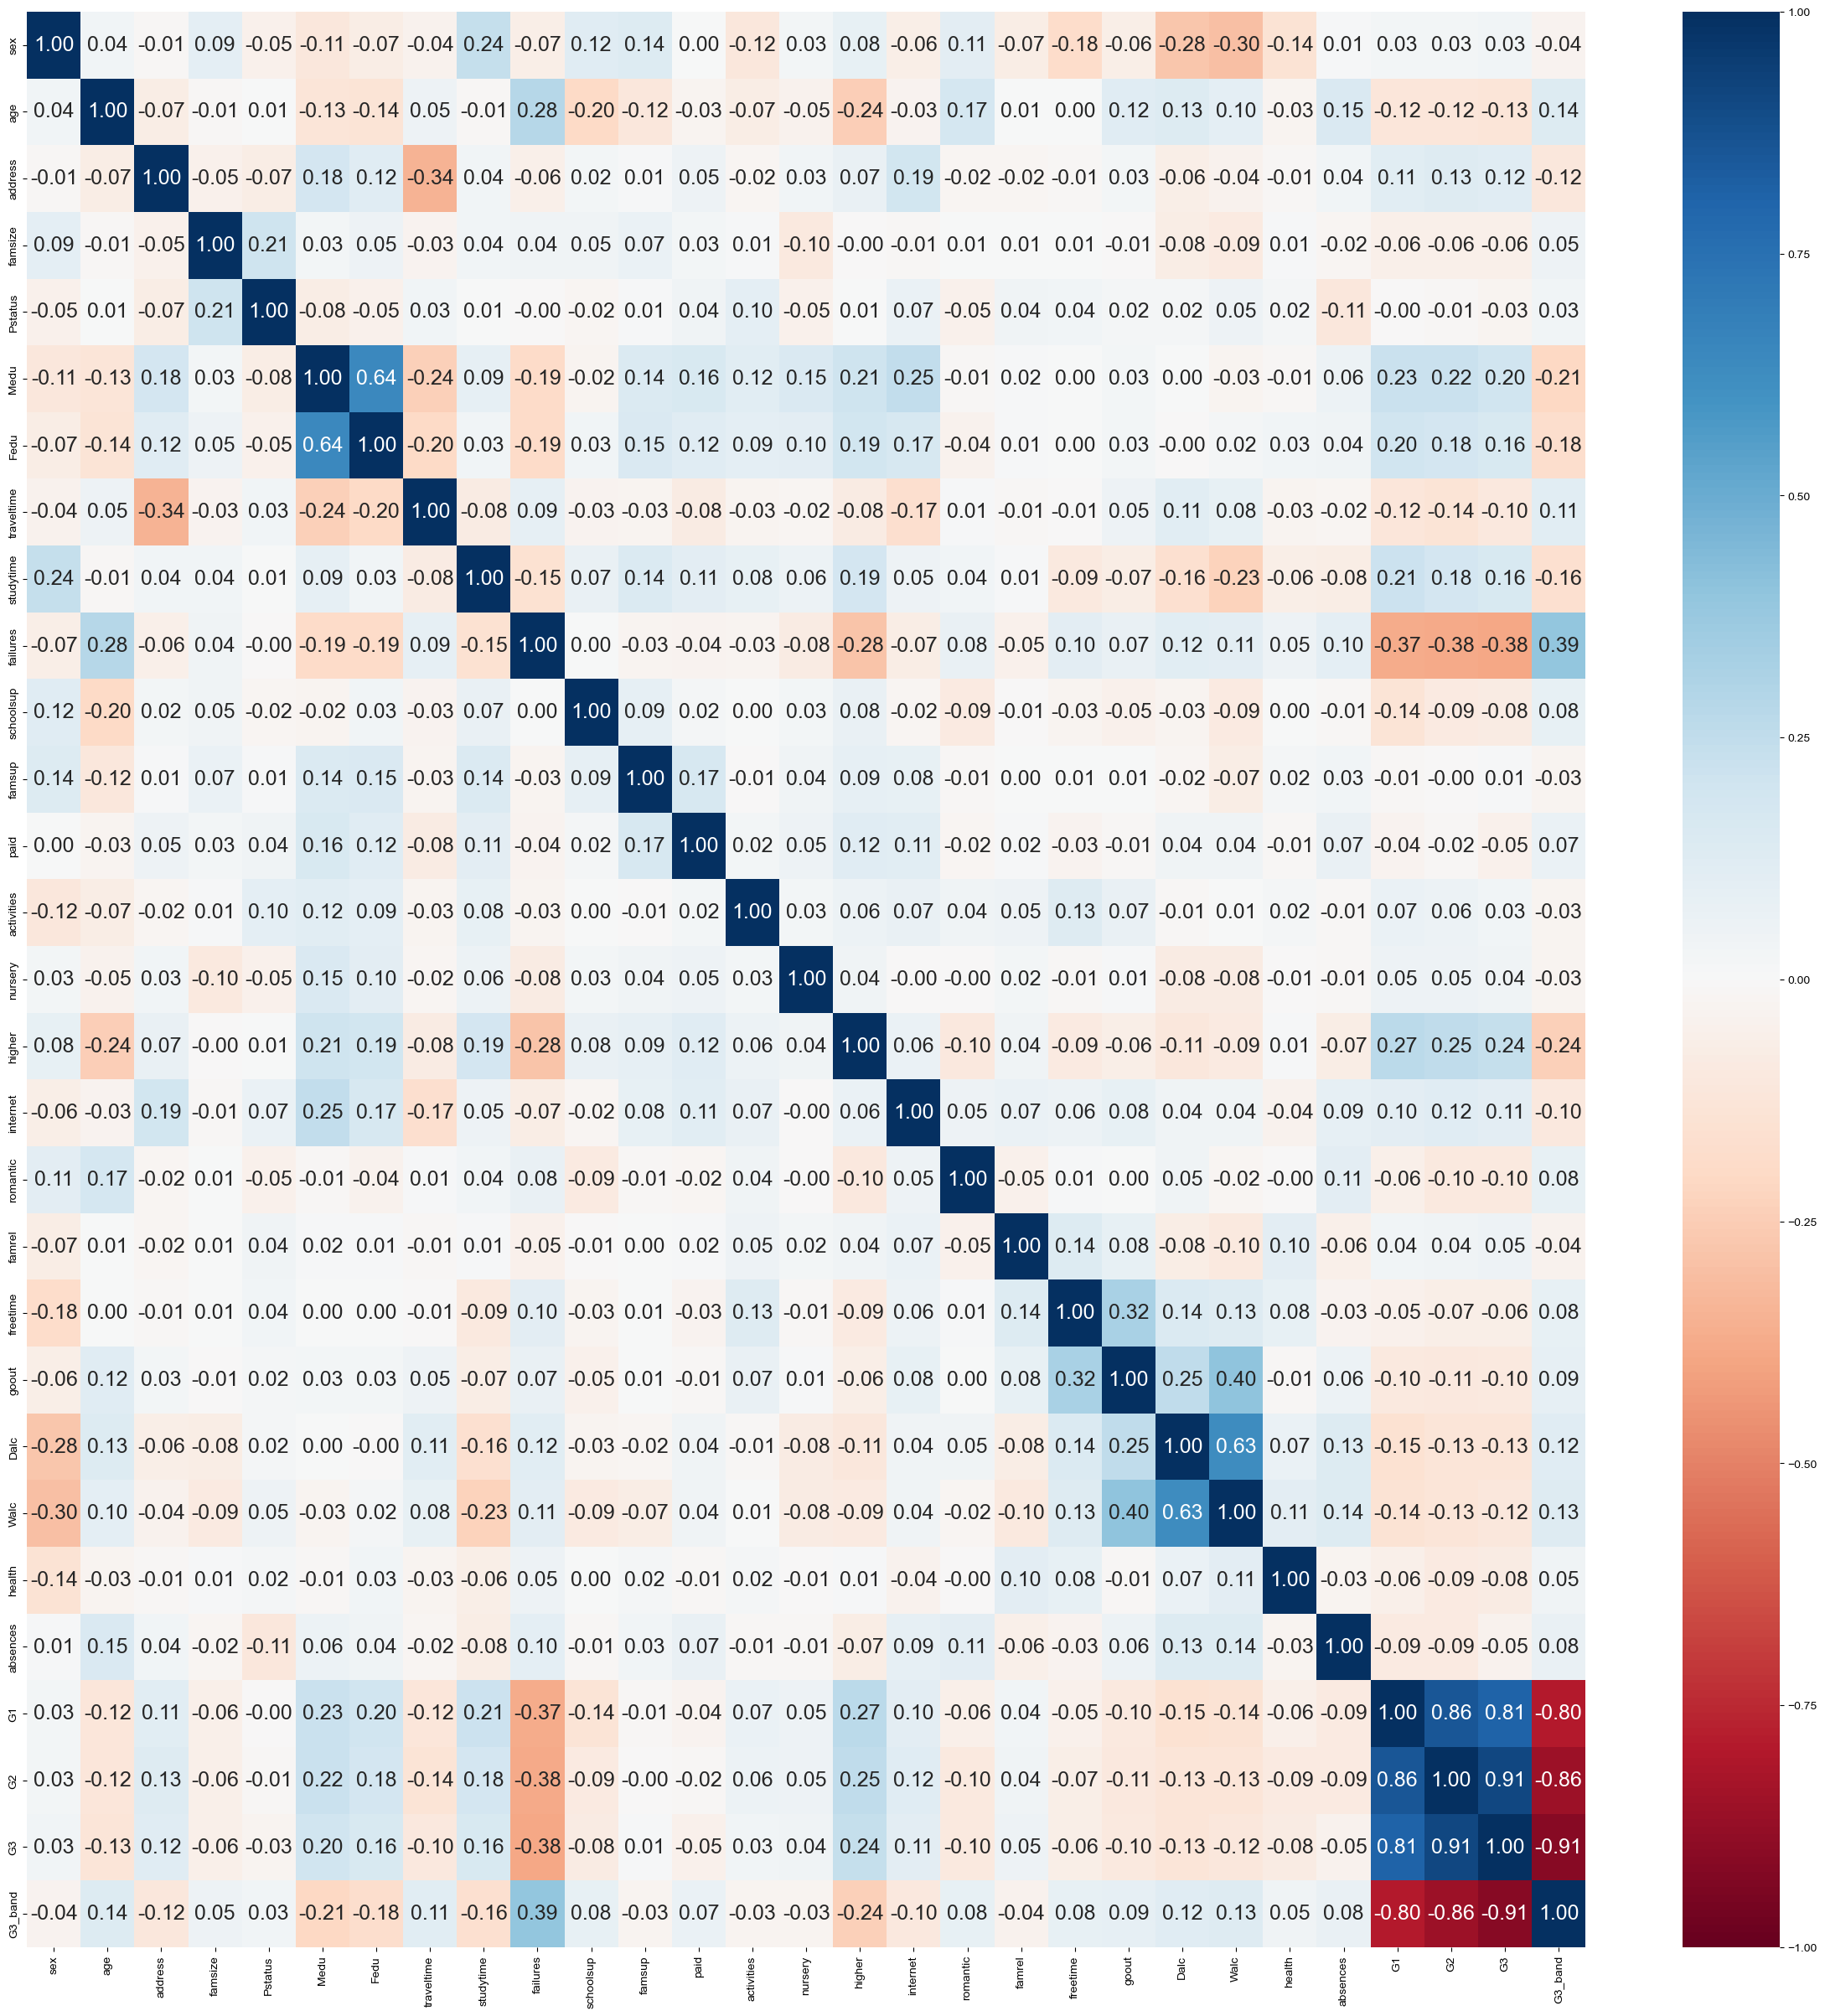

In [17]:
# Correlation Matrix

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(30, 30))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
sb.set(rc={'figure.figsize':(17,8.27)})

By looking at the heatmap of the correlation matrix,
- it seems like "failures" is the best predictor of a student's grades (G1, G2, G3). It has the highest negative correlation with the grades, although not very strong, but still good enough. It is also the best predictor of a student's G3 band.
- a student's first and second period grade (G1 and G2 respectively) are strong indicators of his/her final grade (G3) as they have the highest positive correlation. Naturally, they would be the strongest indicators of a student's G3 band.

A student's interest in wanting to pursue higher education (higher) also has relatively strong correlation to the grades.

Interestingly, if we think about how family background affects a student's grades, there is some insight we can get from the heatmap. We look at the correlation between parents' education (Medu and Fedu). They are among the stronger indicators of grades among all the variables.
- There is a low positive correlation between Medu and G1,G2,G3; and low positive correlation between Fedu and G1,G2,G3.

Medu and Fedu are, among other indicators of family's background such as address, famsize, Pstatus, etc., the stronger indicators of a student's grades as they have a stronger correlation compared to the rest. **We note that these values are categorical**. For that, let's look at their boxplots respective to the grades.

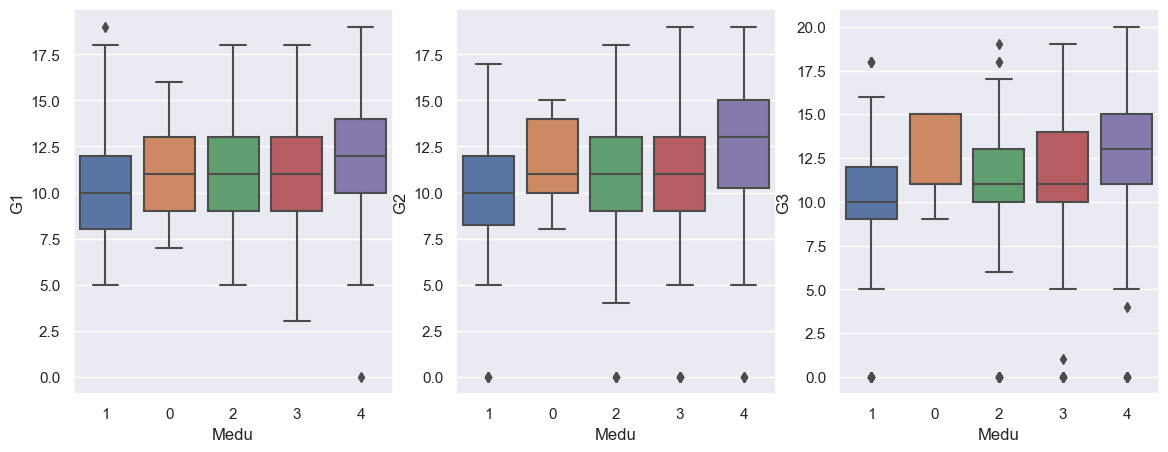

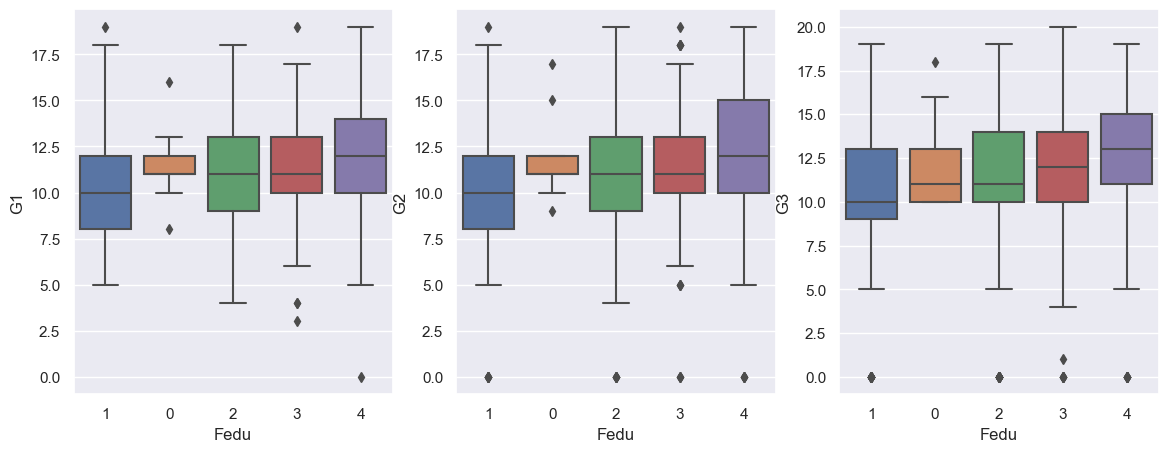

In [18]:
# Boxplots for grades and Medu, Fedu
for var in ['Medu', 'Fedu']:
    fig, ax = plt.subplots(1, 3, figsize=(14, 5))
    for grade, subplot in zip(['G1', 'G2', 'G3'], ax.flatten()):
        sorted_data = data.groupby([var])[grade].median().sort_values()
        sb.boxplot(x=var, y=grade, data=data, ax=subplot, order=list(sorted_data.index))

- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

There is somewhat a relationship between Medu and the respective grades, and Fedu and the respective grades.

For every grade, the parent's education level, when it is higher, tend to result in a higher median score of the tests.

** median score respective to parent's education level

We thus say that the parents' education level have an impact on a student's grades.

There are other columns not in the correlation matrix as they are of 'object' dtype. As we have just looked at family background, let's look at Mjob, Fjob and guardian.

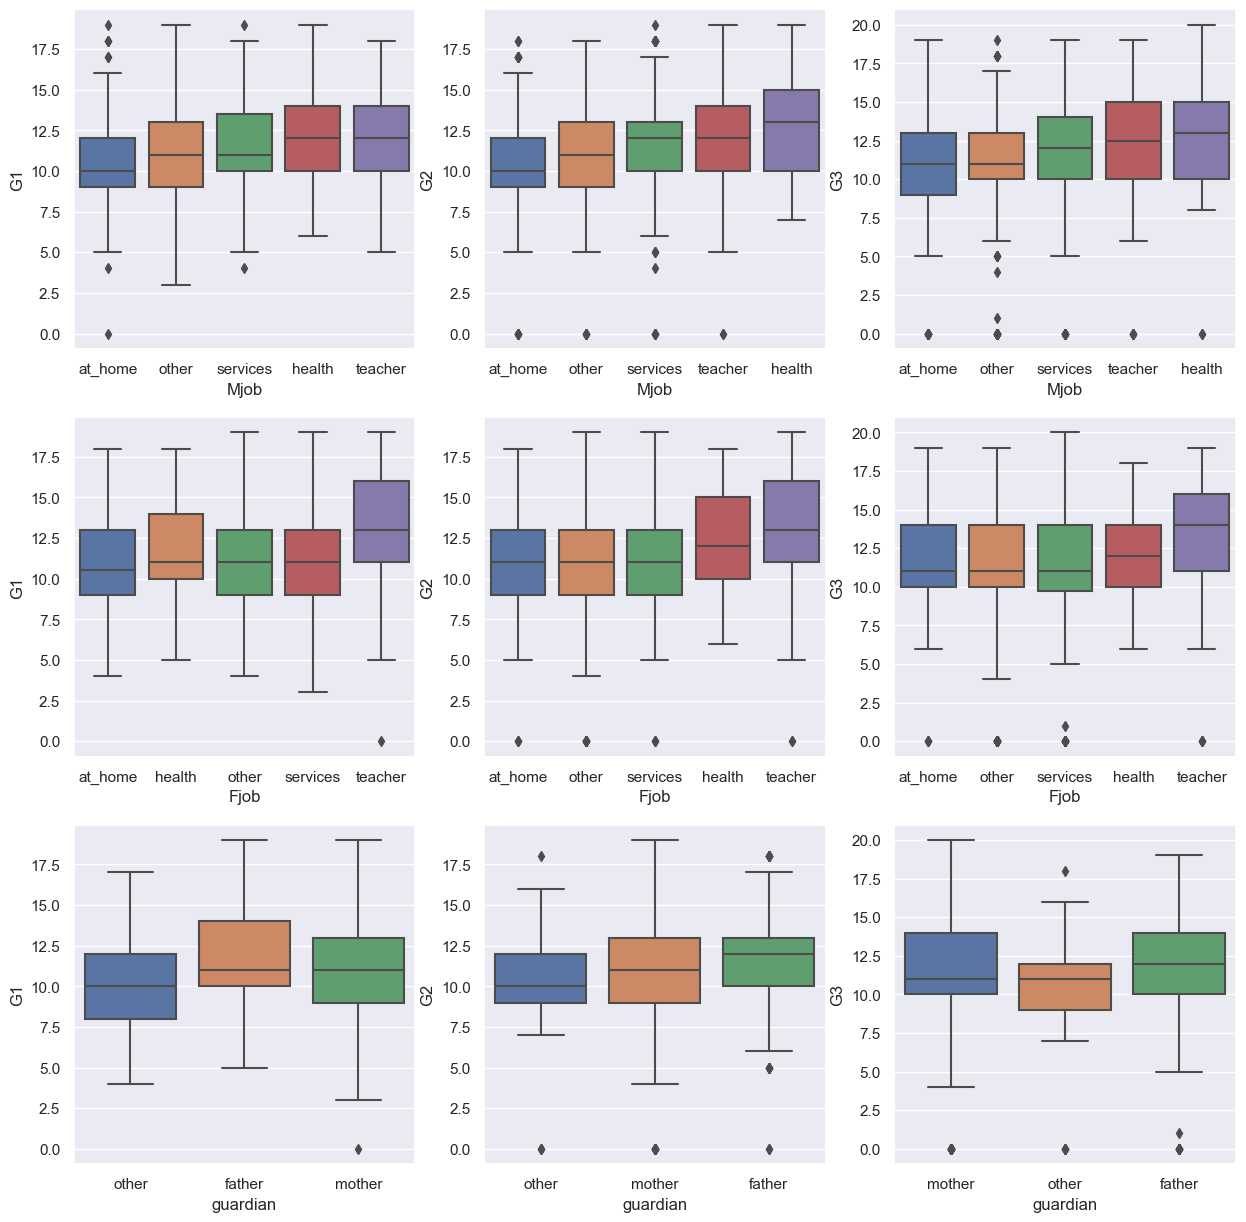

In [19]:
# draw the boxplots for grades against Mjob, Fjob and guardian
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
a = 0
for var in ['Mjob', 'Fjob', 'guardian']:
    b = 0
    for grade in ['G1', 'G2', 'G3']:
        sorted_data = data.groupby([var])[grade].median().sort_values()
        sb.boxplot(x=var, y=grade, data=data, ax=axes[a,b], order=list(sorted_data.index))
        b += 1
    a += 1

- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')

By observation,

#### Mjob
- Mother's job is health has the highest median score, followed by teacher; at_home and other has lowest two respective median scores.

#### Fjob
- Father's job is teacher has the highest median score;

#### Guardian
- Student's guardian is mother or father has same, highest median. Guardian is other has the lowest median.

We will focus on the parents' job being teacher. We think that if a parent is a teacher, it has a higher impact on the student's grade.

## Data Preparation

We have earlier identified that parent's education level and jobs are indicators of a student's grade and naturally grade banding. We will prepare our data accordingly to target these two indicators by creating columns parentEdu and parentJob.
- parentEdu will take on higher value of either parent's education level
- parentJob will indicator if either parent is a teacher or not (0: no; 1: yes)

In [20]:
# For columns Mjob and Fjob
# If they are teachers, indicate 1. Else, indicate 0

print(data['Mjob'].unique())
print(data['Fjob'].unique())

['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']


In [21]:
# Map Mjob  to numeric
data["Mjob"] = data["Mjob"].map({"teacher": 1, "at_home": 0, "health": 0, "other": 0, "services": 0})

# Map Fjob  to numeric
data["Fjob"] = data["Fjob"].map({"teacher": 1, "at_home": 0, "health": 0, "other": 0, "services": 0})

In [22]:
# Create new column where it is 1, if either Mother or Father job is a teacher
def conditions(data):
    if (data['Mjob'] == 1) or (data['Fjob'] == 1):
        return 1
    else:
        return 0

In [23]:
data['parentJob'] = data.apply(conditions, axis=1)

In [24]:
# Create new column where it reflects the highest educational level of their parents

def conditions(data):
    if (data['Medu']) >= (data['Fedu']):
        return data['Medu']
    else:
        return data['Fedu']

In [25]:
data['parentEdu'] = data.apply(conditions, axis=1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   int64 
 2   age         1044 non-null   int64 
 3   address     1044 non-null   int64 
 4   famsize     1044 non-null   int64 
 5   Pstatus     1044 non-null   int64 
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   int64 
 9   Fjob        1044 non-null   int64 
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   int64 
 16  famsup      1044 non-null   int64 
 17  paid        1044 non-null   int64 
 18  activities  1044 non-null   int64 
 19  nursery     1044 non-null   int64 
 20  higher  

We will also be dropping columns that we think are not strong indicators of the student's grades. We referred to the earlier correlation matrix and drop those columns that have weak correlations with the grades and grade banding.

We will also drop Medu, Fedu, Mjob and Fjob as we have created parentEdu and parentJob to replace these values.

In [27]:
# dropping columns that are not relevant
data = data.drop(['reason'], axis=1)
data = data.drop(['guardian'], axis=1)
data = data.drop(['school'], axis=1)
data = data.drop(['sex'], axis=1)
data = data.drop(['Pstatus'], axis=1)
data = data.drop(['famsize'], axis=1)
data = data.drop(['famrel'], axis=1)
data = data.drop(['freetime'], axis=1)
data = data.drop(['health'], axis=1)
data = data.drop(['absences'], axis=1)
data = data.drop(['famsup'], axis=1)
data = data.drop(['paid'], axis=1)
data = data.drop(['activities'], axis=1)
data = data.drop(['nursery'], axis=1)

data = data.drop(['Medu'], axis=1)
data = data.drop(['Fedu'], axis=1)
data = data.drop(['Mjob'], axis=1)
data = data.drop(['Fjob'], axis=1)

In [28]:
data

,age,address,traveltime,studytime,failures,schoolsup,higher,internet,romantic,goout,Dalc,Walc,G1,G2,G3,G3_band,parentJob,parentEdu
0,18,1,2,2,0,1,1,0,0,4,1,1,5,6,6,3,1,4
1,17,1,1,2,0,0,1,1,0,3,1,1,5,5,6,3,0,1
2,15,1,1,2,3,1,1,1,0,2,2,3,7,8,10,3,0,1
3,15,1,1,3,0,0,1,1,1,2,1,1,15,14,15,2,0,4
4,16,1,1,2,0,0,1,0,0,2,1,2,6,10,10,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,0,1,3,1,0,1,1,0,2,1,2,10,11,10,3,0,3
1040,18,1,1,2,0,0,1,1,0,4,1,1,15,15,16,1,1,3
1041,18,1,2,2,0,0,1,0,0,1,1,1,11,12,9,3,0,1
1042,17,1,2,1,0,0,1,1,0,5,3,4,10,10,10,3,0,3


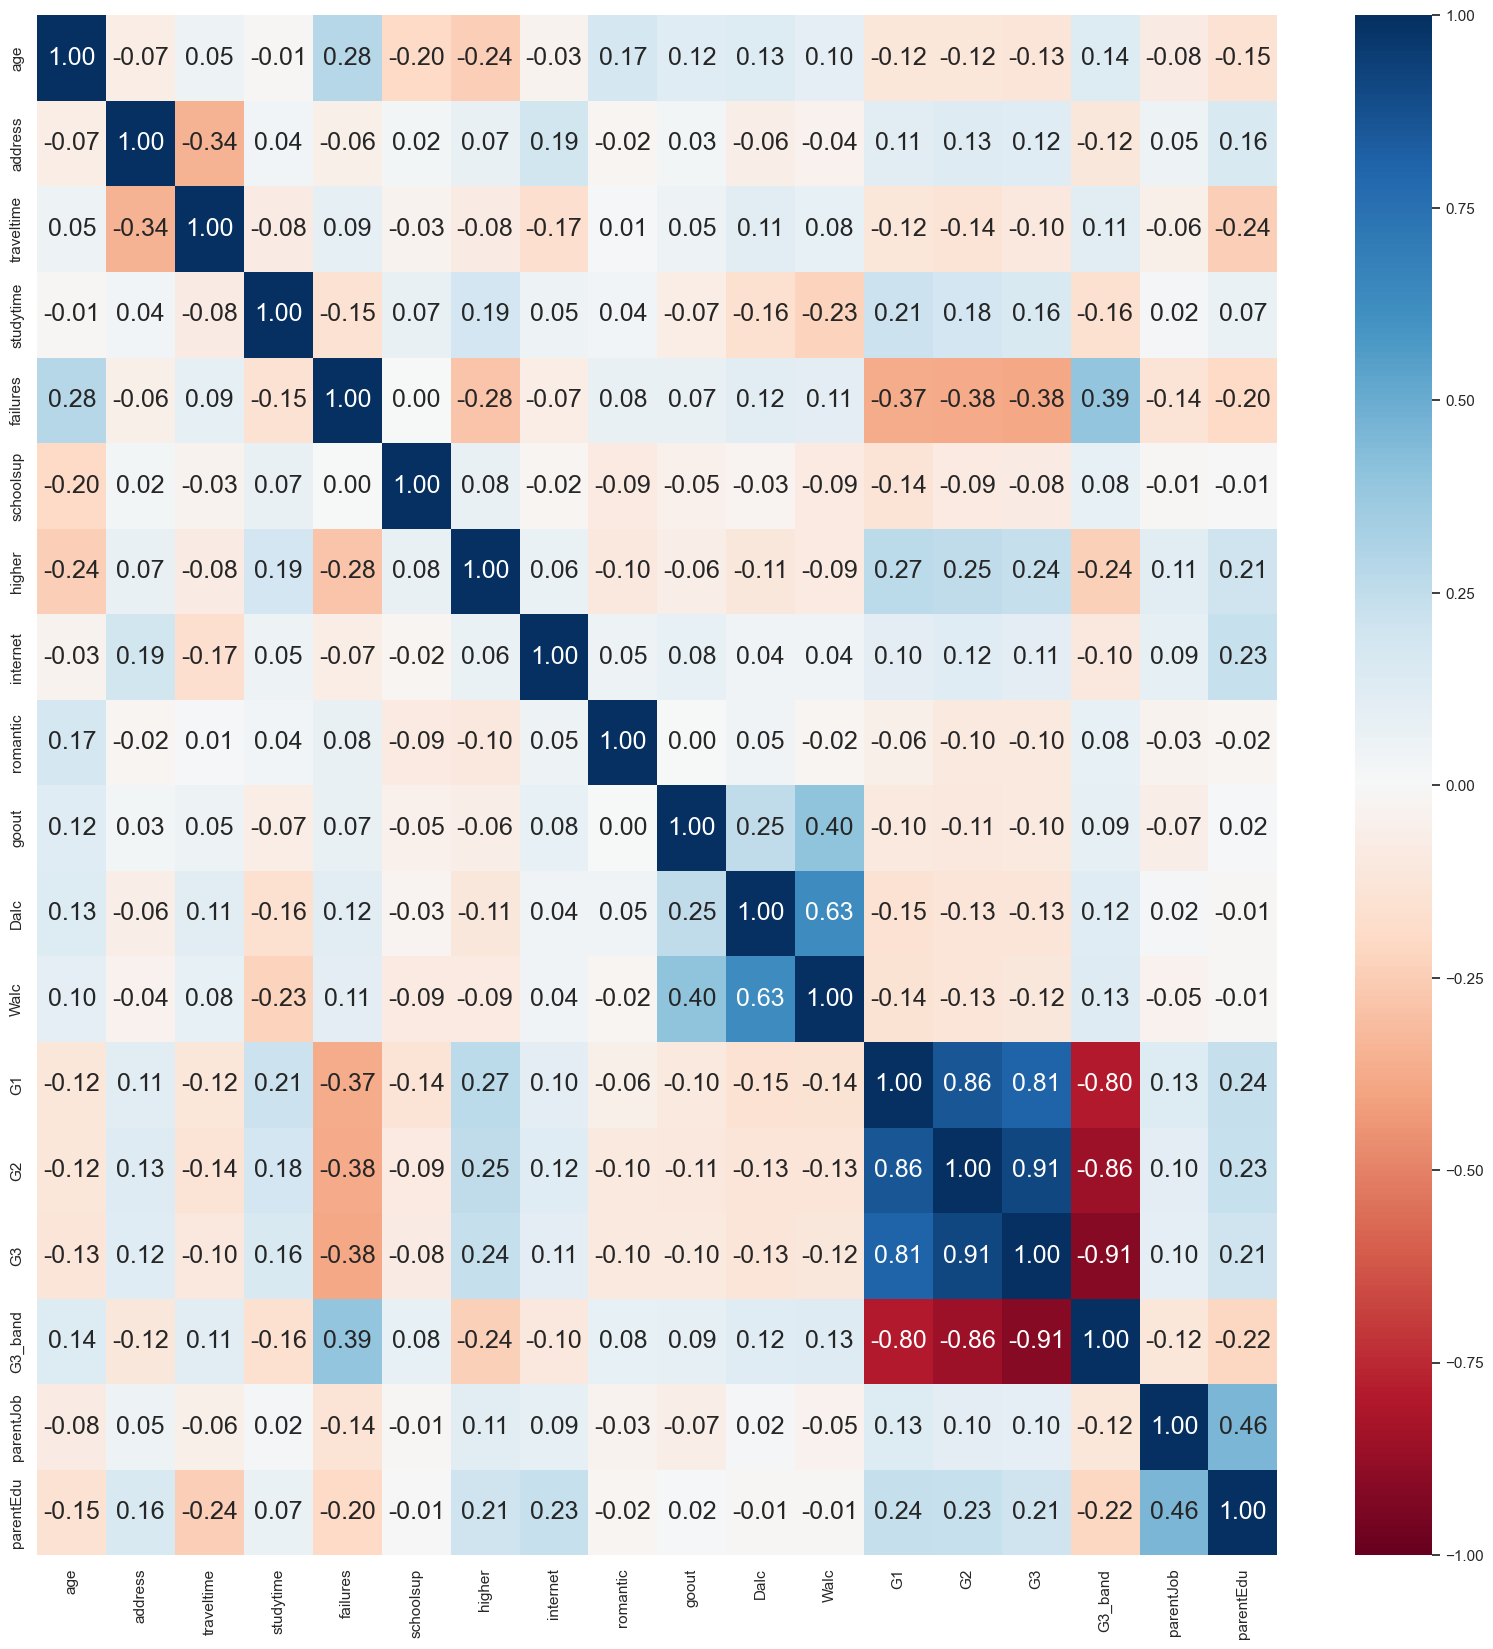

In [29]:
# Correlation Matrix

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
sb.set(rc={'figure.figsize':(17,8.27)})

We are left with the columns which we think could affect a student's grades. We will try to use these variables to predict a student's final grade band (G3 band) using machine learning techniques.

## Preliminary Machine Learning (Methodology)

As we are trying to predict a student's final grade band, we see it as a **multilabel classification problem**. We will explore several machine learning techniques:

- Logistics Regression 
    - Logistic regression is used to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1.

- Support Vector Machines 
    - It can handle both classification and regression on linear and non-linear data. Another reason why we use SVMs is because they can find complex relationships between the data without us needing to do a lot of transformations on our own. It is a great option when working with smaller datasets that have tens to hundreds of thousands of features. They typically find more accurate results when compared to other algorithms because of their ability to handle small, complex dataset.

- Decision Tree 
    - Decision trees help us to evaluate your options. Decision trees are excellent tools for helping us to choose between several courses of action. They provide a highly effective structure within which we can lay out options and investigate the possible outcomes of choosing those options.

- k-Nearest Neighbors 
    - The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, you can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model. The quality of the predictions depends on the distance measure.

- Naive Bayes 
    - It handles both continuous and discrete data. It is highly scalable with the number of predictors and data points. It is fast and can be used to make real-time predictions. It is not sensitive to irrelevant features
***
To determine the accuracy of the respective models, we will use the `accuracy_score` module from the Scikit-Learn library.

- __[`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)__: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

The higher the `accuracy_score` the better as it means it is able to correctly classify a student's final grade band. We will use this as our performance metrics.

### Predictor Features

The predictor features to the machine learning models we will use are the remaining columns we have identified earlier that we think could affect a student's grades. They are: age, address, traveltime, studytime, failures, schoolsup, higher, internet, romantic, goout, Dalc, Walc, G1, G2, parentJob, parentEdu.

### Response Variable

The response variable of the machine learning models will be the **G3_band** of the students, since we want to predict a student's final grade band.

***

### Hyperparameters of models
Reference: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
As we are learning about these models, we will make use of the default hyperparameters in the context of the respective model's scikit-learn implementation. Here we list some of the important hyperparameters of the respective models, based on the reference link.
- Logistics Regression
    - solver: lbgfs - able to handle multinomial loss for multiclass problems
- Support Vector Machines
    - kernel: rbf - default
- Decision Tree
- k-Nearest Neighbors
    - n_neighbors: 5 - default
- Naive Bayes

After we explored the different machine learning techniques, we will select one model to explore further, modifying the inputs to the model to see if we can improve the chosen model.

Our initial inputs include all the columns we think could affect a student's grades. We will modify them to only include the stronger indicators of a student's grade: failures, higher, G1, G2, parentJob, parentEdu.

** the labels for the confusion matrix should +1 for the G3_bands

### Split Data into Train and Test Sets

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y = data["G3_band"].values
X = data.drop(["G3","G3_band"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=723)

### Logistics Regression

Accuracy score for logistic regression with train set:  81.08
Accuracy score for logistic regression with test set:  78.47
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

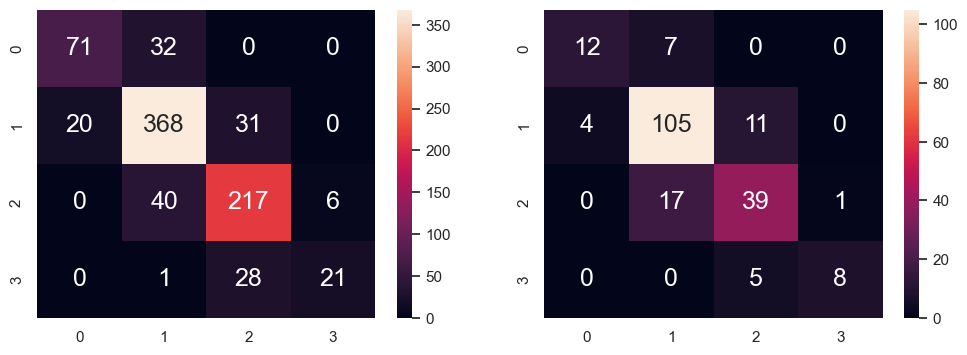

In [31]:
# Logistic Regression for train
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
acc_logreg_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score for logistic regression with train set: ", acc_logreg_train)

# for test
y_pred_test = logreg.predict(X_test)
acc_logreg_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score for logistic regression with test set: ", acc_logreg_test)

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Support Vector Machines

Accuracy score for SVM with train set:  83.35
Accuracy score for SVM with test set:  85.65
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

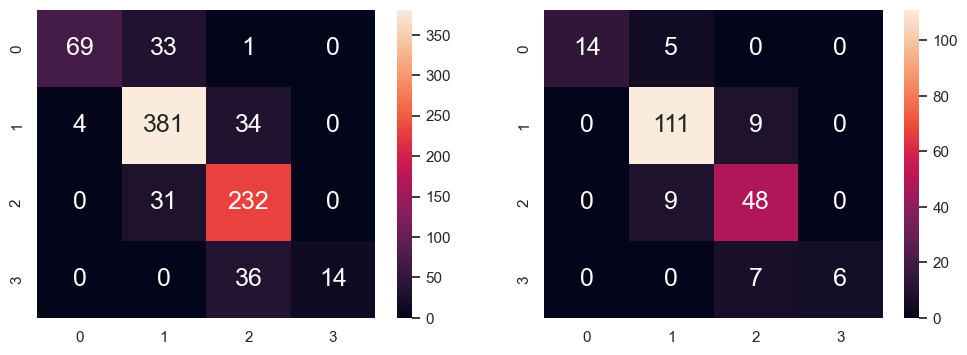

In [32]:
# Support Vector Machines for train
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
acc_svc_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score for SVM with train set: ", acc_svc_train)

# for test
y_pred_test = svc.predict(X_test)
acc_svc_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score for SVM with test set: ", acc_svc_test)

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Decision Tree

Accuracy score for decision tree with train set:  99.76
Accuracy score for decision tree with test set:  82.3
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

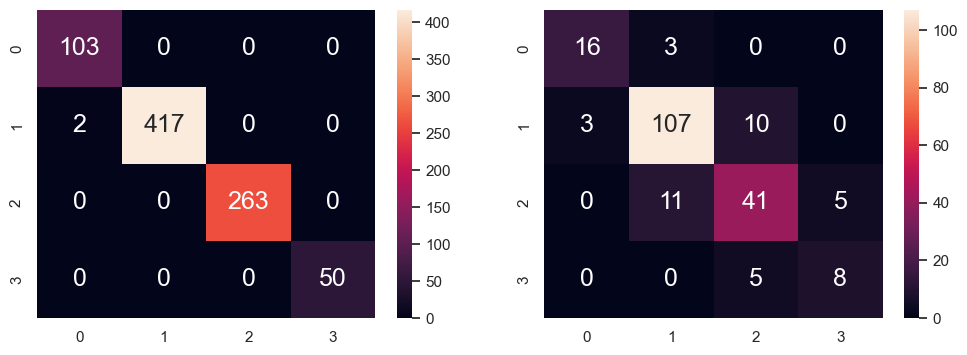

In [33]:
#Decision Tree for train
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

y_pred_train = decisiontree.predict(X_train)
acc_decisiontree_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score for decision tree with train set: ", acc_decisiontree_train)

# for test
y_pred_test = decisiontree.predict(X_test)
acc_decisiontree_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score for decision tree with test set: ", acc_decisiontree_test)

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### k-Nearest Neighbors

Accuracy score for KNN with train set:  85.75
Accuracy score for KNN with test set:  82.78
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

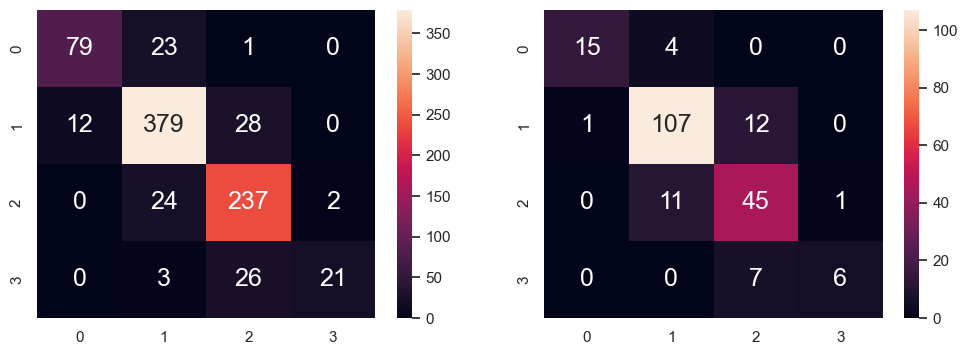

In [34]:
# KNN or k-Nearest Neighbors for train
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
acc_knn_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score for KNN with train set: ", acc_knn_train)

# for test
y_pred_test = knn.predict(X_test)
acc_knn_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score for KNN with test set: ", acc_knn_test)

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Naive Bayes

Accuracy score for NB with train set:  57.72
Accuracy score for NB with test set:  55.02
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

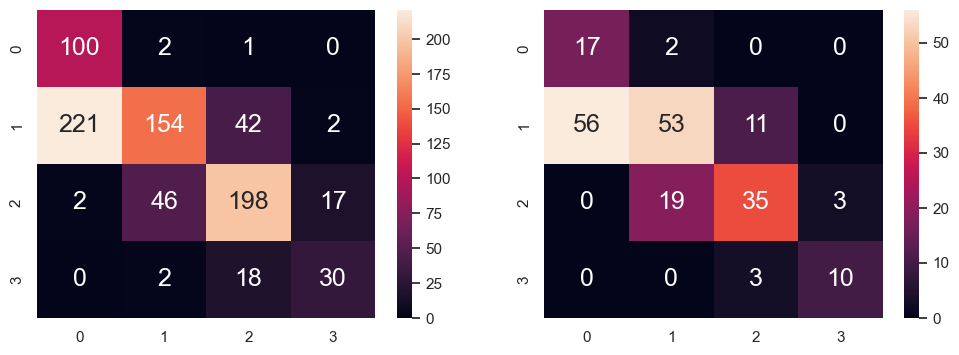

In [35]:
# Gaussian Naive Bayes for test
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred_train = gaussian.predict(X_train)
acc_gaussian_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score for NB with train set: ", acc_gaussian_train)

# for test
y_pred_test = gaussian.predict(X_test)
acc_gaussian_test = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score for NB with test set: ", acc_gaussian_test)

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Machine Learning (Experiments)

Accuracy scores of respective models

Logistics Regression
- Accuracy score for logistic regression with train set:  81.08
- Accuracy score for logistic regression with test set:  78.47

SVM
- Accuracy score for SVM with train set:  83.35
- Accuracy score for SVM with test set:  85.65

Decision Tree
- Accuracy score for decision tree with train set:  99.76
- Accuracy score for decision tree with test set:  84.21

KNN
- Accuracy score for KNN with train set:  85.75
- Accuracy score for KNN with test set:  82.78

NB
- Accuracy score for NB with train set:  57.72
- Accuracy score for NB with test set:  55.02

*I swear I'm not scolding anyone nor this project when I used KNN, NB.*

### Analysis
We see that the accuracy scores of the Decision Tree model is the best (highest for train set, second highest for test set). When we look at the confusion matrix for the model, the misclassifications of G3_band do not deviate much from the actual G3_band (misclassified by at most 1 grade band off), which we think is quite good.
- However, the huge difference in accuracy scores of the Decision Tree model between the train set (99.76%) and test set (84.21%) makes us concerned with issues of overfitting.

The next best, we would say, is a tie between the SVM and KNN models as their accuracy scores trail closely behind Decision Tree model's. 
- for train set: KNN has a higher accuracy score of 85.75 compared to SVM's 83.35.
- for test set: KNN has a lower accuracy score of 82.78 compared to SVM's 85.65.

As such, we will try to modify the inputs to the SVM and KNN models to see if we can improve the accuracy score.

Our initial inputs include all the columns we think could affect a student's grades. We will modify them to only include the stronger indicators of a student's grade: **failures, higher, G1, G2, parentJob, parentEdu**. Since we are left with only the indicators we think are the stronger in predicting a student's grade, we may see a difference in the classification accuracy of the model.

In [36]:
y2 = data["G3_band"].values
X2 = data[["failures","higher","G1","G2","parentJob","parentEdu"]].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=723)

Accuracy score for the train set=84.07%
Accuracy score for the test set=85.65%
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

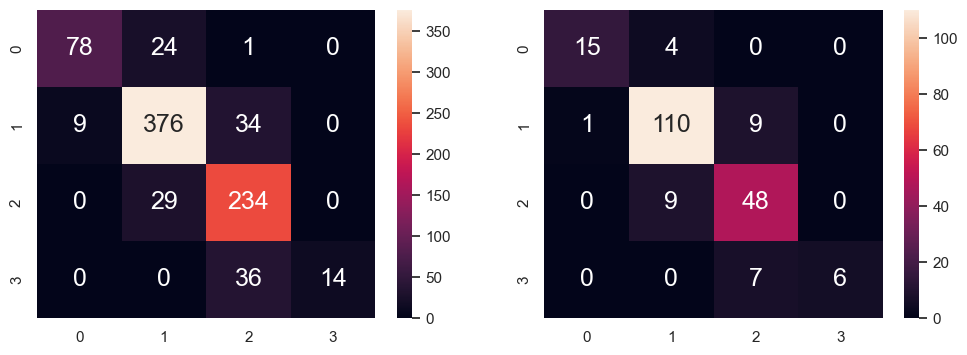

In [40]:
svc2 = SVC()
svc2.fit(X2_train, y2_train)

# score model for train set
y2_hat_train= svc2.predict(X2_train)
score_train = accuracy_score(y2_train, y2_hat_train)
print("Accuracy score for the train set={:.2f}%".format(score_train*100))

# score model for test set
y2_hat= svc2.predict(X2_test)
score = accuracy_score(y2_test, y2_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y2_hat_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y2_hat), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Accuracy score for the train set=85.99%
Accuracy score for the test set=84.69%
Confusion matrix (left: train data; right: test data)


<AxesSubplot:>

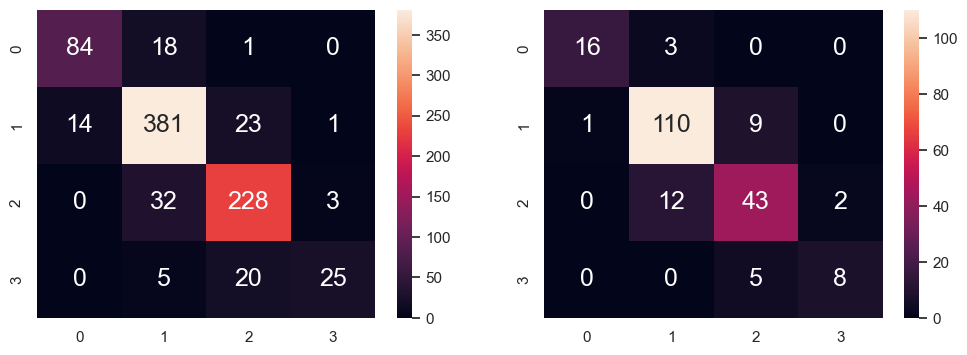

In [41]:
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

# score model for train set
y2_hat_train= knn2.predict(X2_train)
score_train = accuracy_score(y2_train, y2_hat_train)
print("Accuracy score for the train set={:.2f}%".format(score_train*100))

# score model for test set
y2_hat= knn2.predict(X2_test)
score = accuracy_score(y2_test, y2_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

# Plot the Confusion Matrix for Train and Test
print("Confusion matrix (left: train data; right: test data)")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y2_hat_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y2_hat), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

There is a slight improvement in the accuracy scores for both models after modifying the inputs.

- SVM
    - Initial accuracy scores
        - Accuracy score for SVM with train set:  83.35
        - Accuracy score for SVM with test set:  85.65
    - After improvement
        - Accuracy score for the train set=84.07%
        - Accuracy score for the test set=85.65%
- KNN
    - Initial accuracy scores
        - Accuracy score for KNN with train set:  85.75
        - Accuracy score for KNN with test set:  82.78
    - After improvement
        - Accuracy score for the train set=85.99%
        - Accuracy score for the test set=84.69%

## Conclusion

From our experiments with the different machine learning models, we see that the models using Support Vector Machines, Decision Tree and k-Nearest Neighbors have quite high accuracy scores in predicting student's grade band.
- Decision Tree model is quite accurate in predicting on the train set (with 99.76% accuracy), but trails behind SVM in predicting on test set. However, in the case of Decision Tree, the biggest error that the system makes is overfitting, which can be seen from the huge difference of scores in Train set and Test set.
- SVM and KNN have relatively similar accuracies in predicting student's grade band.

The initial models make use of many columns to predict a student's grade band. To try to improve it, we narrowed to a few columns which we have identified earlier in our EDA to be stronger indicators of grades, and it did show some improvement in the accuracy scores.
***
**Limitations of current models**

We can further improve the models by removing students who are outliers in terms of their grades (i.e. outliers in G1, G2, G3), and we may see a difference in the accuracy of the models after the removal.

For the issue of overfitting with the Decision Tree model, we could also try data augmentation, a technique to increase the training set by creating modified copies of the dataset using existing data; and reducing the number of features so that the model do not have to learn too many features which eventually leads to overfittting.